In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('customer_segmentation.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data = data[data.TotalCharges != ' ']
data.TotalCharges = data.TotalCharges.astype(float)

<ipython-input-4-cc7eff5d1f0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.TotalCharges = data.TotalCharges.astype(float)


In [5]:
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'PaperlessBilling', 'Churn']
for i in replace_cols:
    data.loc[:, i]  = data.loc[:, i].replace({'No internet service' : 'No', 'No phone service':'No'})
    data.loc[:, i]  = data.loc[:, i].map({'No':0, 'Yes':1})
data.gender = data.gender.replace({'Male': 1, 'Female': 0})

<ipython-input-5-d4aaa6b4cec9>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i]  = data.loc[:, i].map({'No':0, 'Yes':1})
<ipython-input-5-d4aaa6b4cec9>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, i]  = data.loc[:, i].map({'No':0, 'Yes':1})
<ipython-input-5-d4aaa6b4cec9>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-uni

In [6]:
other = ['Contract', 'PaymentMethod', 'InternetService']
for i in other:
    data = data.join(pd.get_dummies(data[i], prefix=i))
data.drop(other, axis=1, inplace=True)

In [7]:
services = ['PhoneService', 'MultipleLines', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'InternetService_DSL', 'InternetService_Fiber optic',
            'InternetService_No']
data['nr_services'] = data.apply(lambda row: sum([row[x] for x in services[:-1]]), 1)
data.drop('customerID', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

<Axes: xlabel='TotalCharges', ylabel='tenure'>

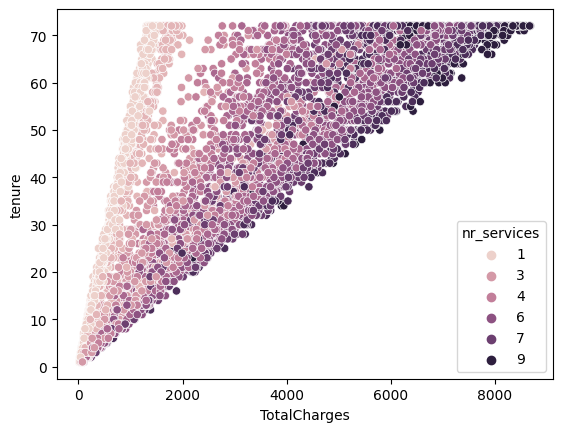

In [8]:
sns.scatterplot(x=data.TotalCharges, y=data.tenure, hue=data.nr_services)

<ipython-input-9-91e22fb59124>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  square=True, mask=np.zeros_like(corr, dtype=np.bool))


<Axes: >

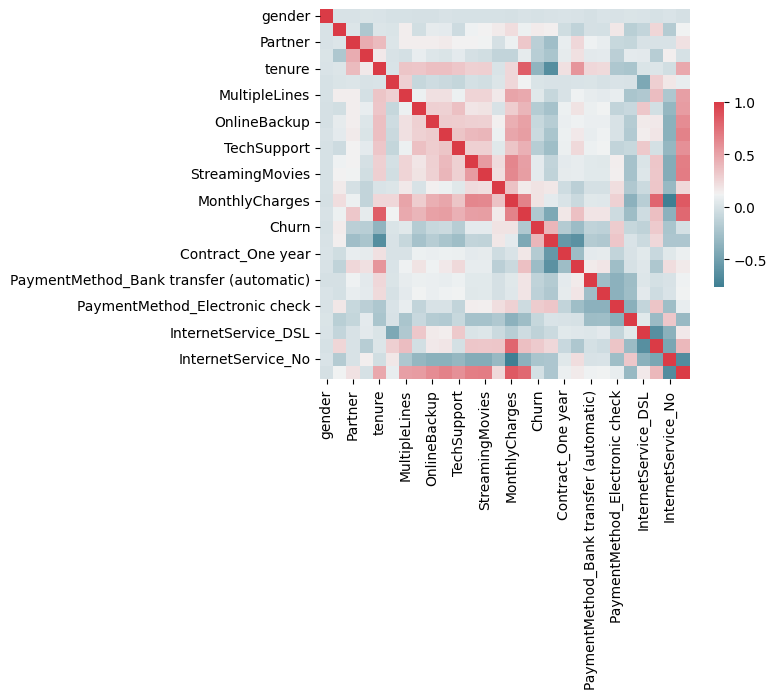

In [9]:
corr = data.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), cbar_kws={"shrink": .5},
            square=True, mask=np.zeros_like(corr, dtype=np.bool))

In [10]:
data1 = data.drop('Churn', axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

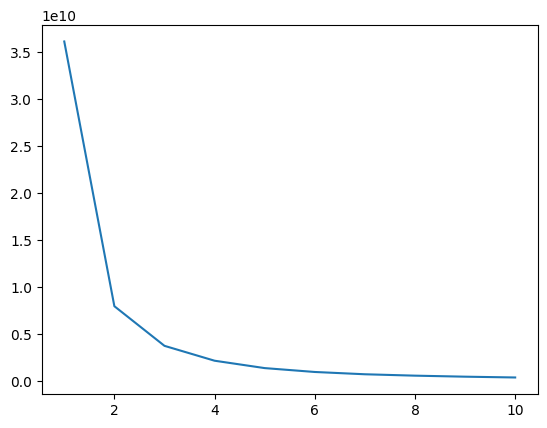

In [11]:
from sklearn.cluster import KMeans
cost = []
for k in range(1,11):
    model = KMeans(n_clusters = k, init='k-means++', random_state=21, )
    model.fit(data1)
    cost.append(model.inertia_)
sns.lineplot(x=range(1,11), y = cost)

In [12]:
model = KMeans(n_clusters= 3)
model.fit(data1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

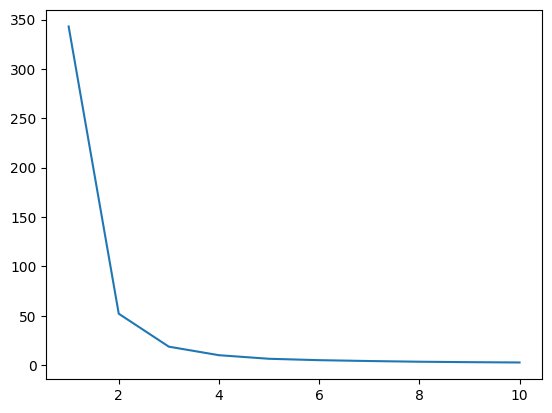

In [13]:
from sklearn.preprocessing import normalize
norm_data = normalize(data1)
scores = [KMeans(n_clusters = i+1).fit(norm_data).inertia_ for i in range(10)]
sns.lineplot(x=range(1,11), y=scores)

In [14]:
norm_model = KMeans(n_clusters = 3)
norm_model.fit(norm_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

<Axes: xlabel='x', ylabel='y'>

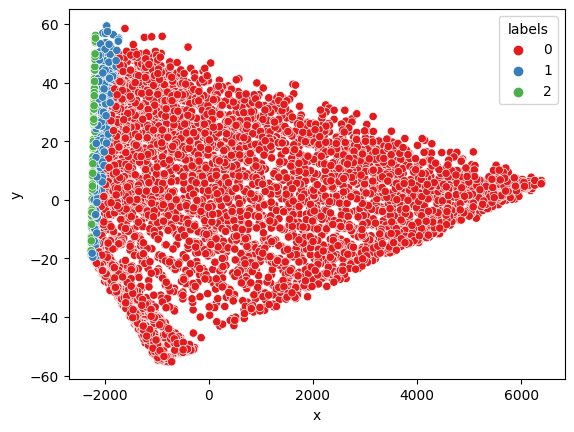

In [15]:
from sklearn.decomposition import PCA
name = ['x', 'y', 'z']
matrix = PCA(n_components = 3).fit_transform(data1)
pca_model = pd.DataFrame(matrix)
pca_model.rename({i:name[i] for i in range(3)}, axis=1, inplace=True)
pca_model['labels'] = norm_model.labels_
sns.scatterplot(x=pca_model.x, y=pca_model.y, hue=pca_model.labels, palette='Set1')

In [16]:
from sklearn.metrics import silhouette_score
print('Silhouette Coefficients for each model:')
print('K-Means Clustering: {}'.format(round(silhouette_score(data1, model.labels_, metric = 'euclidean')*100, 3)))
print('K-Means Clustering with Normalized Vectors: {}'.format(round(silhouette_score(norm_data, norm_model.labels_, metric = 'cosine')*100, 3)))

Silhouette Coefficients for each model:
K-Means Clustering: 64.459
K-Means Clustering with Normalized Vectors: 91.605
